In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib as plt

In [63]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression

In [5]:
pd.__version__

'1.4.2'

In [38]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-01.parquet')

In [39]:
df = df[df.payment_type == 2]

In [40]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime

In [41]:
td = df.duration.iloc[0]

In [42]:
td.total_seconds() / 60

5.566666666666666

In [43]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [44]:
df = df[(df.duration >= 1) & (df.duration <= 60)]

In [45]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [46]:
df[categorical] = df[categorical].astype(str)

In [47]:
df.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
cbd_congestion_fee              float64
duration                        float64
dtype: object

In [ ]:
dv = DictVectorizer()

In [51]:
train_dicts = df[categorical + numerical].to_dict(orient='records')

In [53]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [59]:
target = 'duration'
y_train = df[target].values

In [76]:
y_train

array([ 5.56666667,  3.53333333, 20.03333333, ..., 14.48333333,
        7.58333333,  3.28333333])

In [77]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred = lr.predict(X_train)

In [81]:
y_pred

array([11.57751167, 11.19397884, 11.55186265, ..., 13.23740758,
       12.76216761, 10.73519014])

/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/codespace/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<module 'matplotlib.legend' from '/home/codespace/anaconda3/lib/python3.9/site-packages/matplotlib/legend.py'>

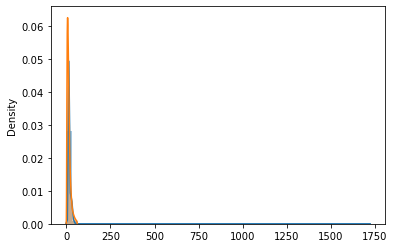

In [82]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend